**data acquisition **

*   extract data
*   scrape data
*   query data
*   collect data
*   combine data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy as sc


In [ ]:
df =  pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


**data filtering**
* outliers
* errors/noise
* duplicates
* invalid values

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


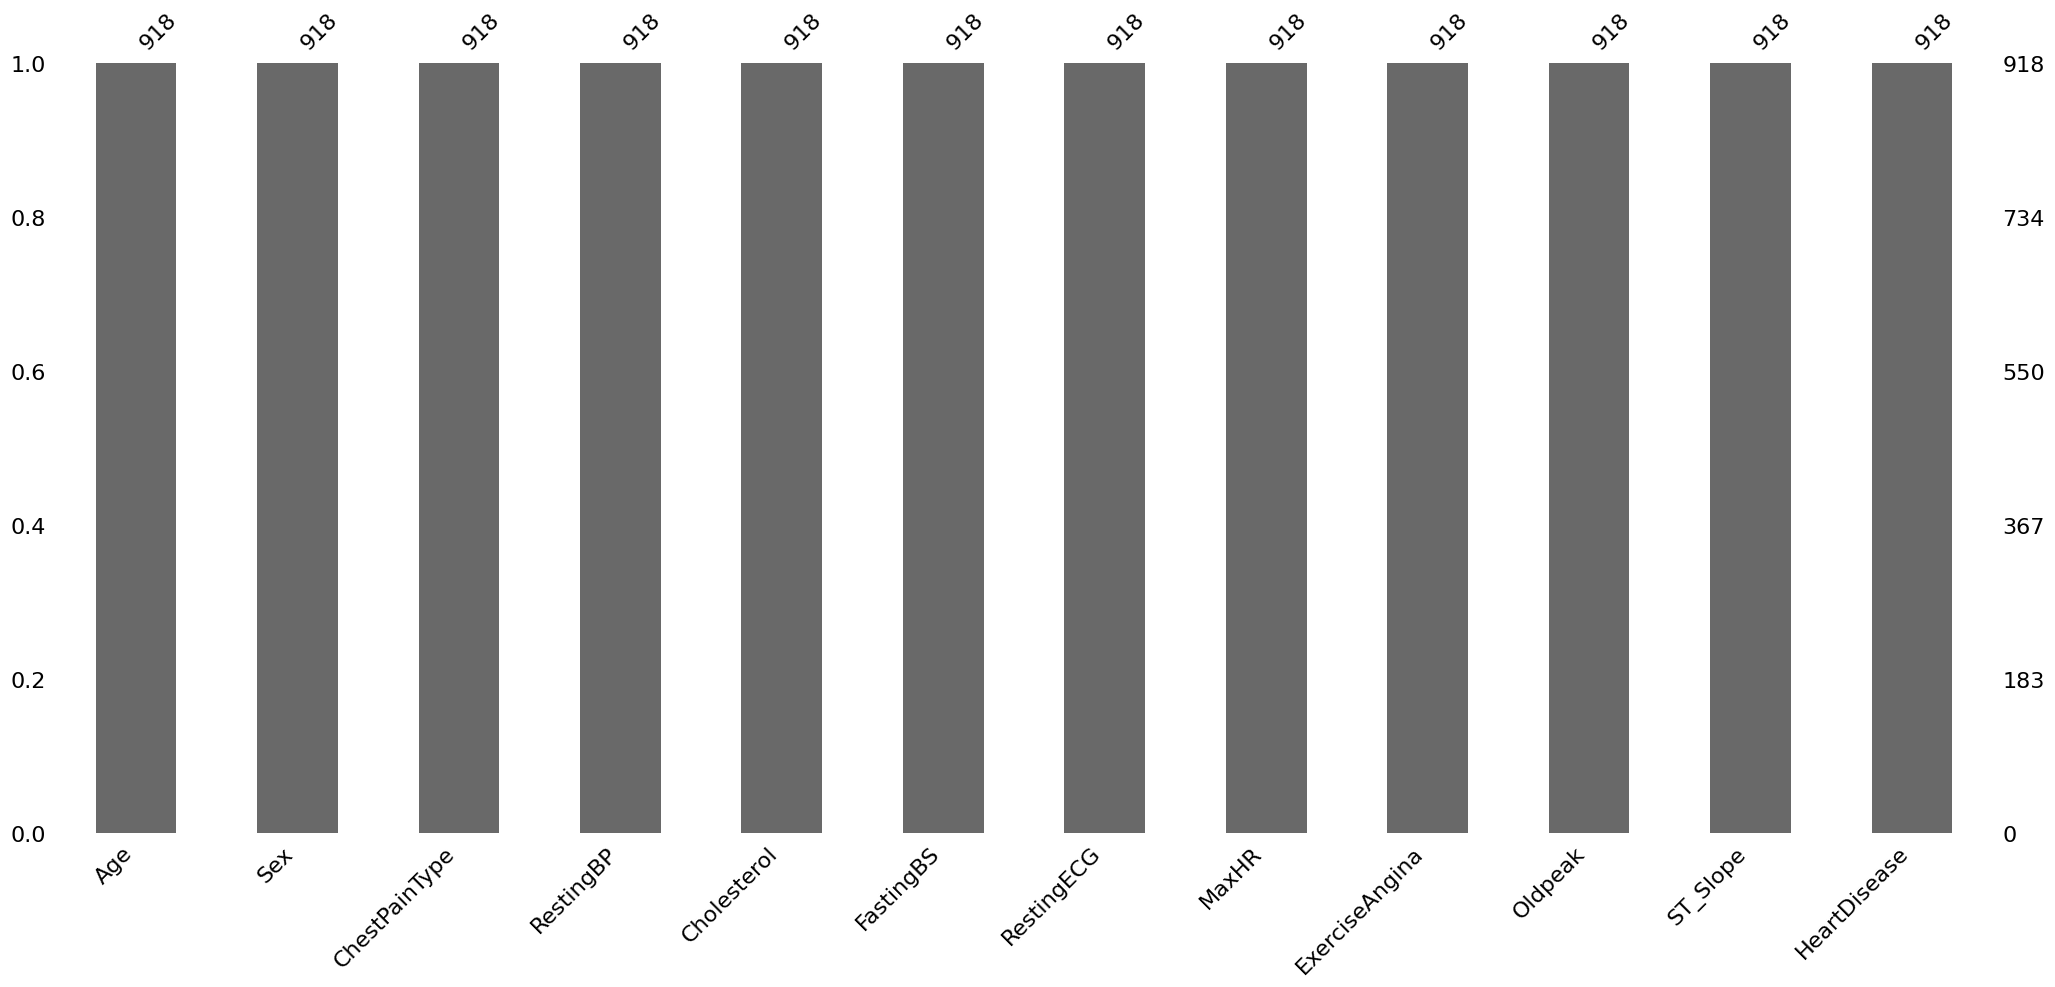

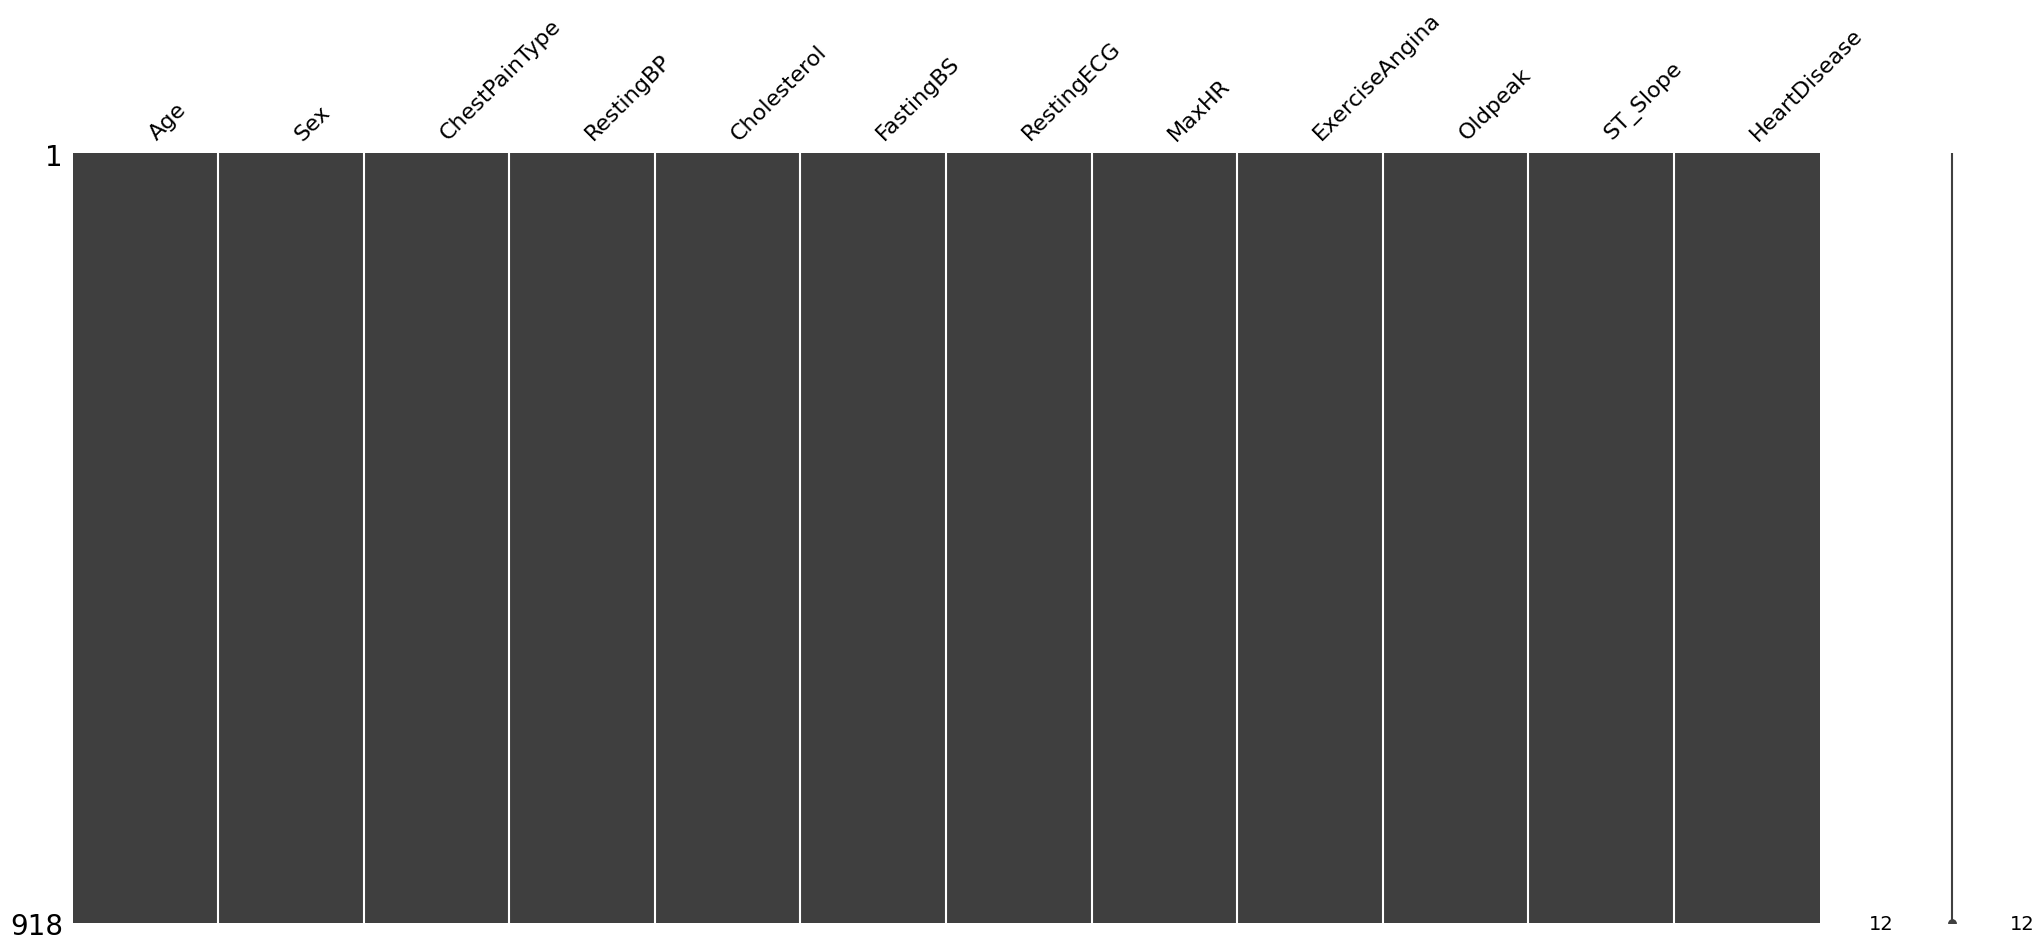

In [ ]:
import missingno as mano
mano.bar(df)
mano.matrix(df)
plt.show()

In [ ]:
df['Sex'] = df['Sex'].replace('M',0)
df['Sex'] = df['Sex'].replace('F',1)
df.head()

/tmp/ipython-input-7-3048095698.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace('F',1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,0.21,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,0.41,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,0.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,0.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,0.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,1.00,200.00,603.00,1.00,202.00,6.20,1.00


In [ ]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.00,918.00,918,918.00,918.00,918.00,918,918.00,918,918.00,918,918.00
unique,NaN,NaN,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,NaN,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,NaN,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.51,0.21,NaN,132.40,198.80,0.23,NaN,136.81,NaN,0.89,NaN,0.55
std,9.43,0.41,NaN,18.51,109.38,0.42,NaN,25.46,NaN,1.07,NaN,0.50
min,28.00,0.00,NaN,0.00,0.00,0.00,NaN,60.00,NaN,-2.60,NaN,0.00
25%,47.00,0.00,NaN,120.00,173.25,0.00,NaN,120.00,NaN,0.00,NaN,0.00
50%,54.00,0.00,NaN,130.00,223.00,0.00,NaN,138.00,NaN,0.60,NaN,1.00
75%,60.00,0.00,NaN,140.00,267.00,0.00,NaN,156.00,NaN,1.50,NaN,1.00


In [51]:
df.isnull().sum()
df['FastingBS'].unique()

array([0, 1], dtype=int32)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
cat_col = df.select_dtypes(include='object').columns
print(cat_col)

Index(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


# converting categorical variables to numeric
* sex: m = 0, f=1
* chestpaintype: ata=0, nap=1 , asy = 2,ta = 3
* resting ecg: normal =0 , st=1 , lhv =2
* exercise angina: n=0,y=1
* st_slop: ip=0, flat =1 ,down =2


In [ ]:
df['ChestPainType'] = df['ChestPainType'].replace({
    'ATA':0 ,
    'NAP': 1,
    'ASY': 2,
    'TA':3
})
df.head()

/tmp/ipython-input-15-14781681.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ChestPainType'] = df['ChestPainType'].replace({


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,Normal,172,N,0.00,Up,0
1,49,1,1,160,180,0,Normal,156,N,1.00,Flat,1
2,37,0,0,130,283,0,ST,98,N,0.00,Up,0
3,48,1,2,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,0,1,150,195,0,Normal,122,N,0.00,Up,0


In [ ]:
for cols in cat_col:
  df[cols]=df[cols].replace(df[cols].unique(),range(df[cols].nunique()))
df.head()

/tmp/ipython-input-16-1242547000.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols]=df[cols].replace(df[cols].unique(),range(df[cols].nunique()))


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.00,0,0
1,49,1,1,160,180,0,0,156,0,1.00,1,1
2,37,0,0,130,283,0,1,98,0,0.00,0,0
3,48,1,2,138,214,0,0,108,1,1.50,1,1
4,54,0,1,150,195,0,0,122,0,0.00,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
df['Cholesterol'] = df['Cholesterol'].replace(0,np.nan)

In [ ]:
df['Cholesterol'].value_counts()


,count
Cholesterol,
254.00,11
223.00,10
220.00,10
230.00,9
211.00,9
...,...
353.00,1
278.00,1
157.00,1


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.00,0.00,0.00,140.00,289.00,0.00,0.00,172.00,0.00,0.00,0.00,0.00
1,49.00,1.00,1.00,160.00,180.00,0.00,0.00,156.00,0.00,1.00,1.00,1.00
2,37.00,0.00,0.00,130.00,283.00,0.00,1.00,98.00,0.00,0.00,0.00,0.00
3,48.00,1.00,2.00,138.00,214.00,0.00,0.00,108.00,1.00,1.50,1.00,1.00
4,54.00,0.00,1.00,150.00,195.00,0.00,0.00,122.00,0.00,0.00,0.00,0.00


In [ ]:
df['Cholesterol'].value_counts()
df['Cholesterol'].isna().sum()

np.int64(0)

In [ ]:
df['RestingBP'] = df['RestingBP'].replace(0,np.nan)


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.00,0.00,0.00,140.00,289.00,0.00,0.00,172.00,0.00,0.00,0.00,0.00
1,49.00,1.00,1.00,160.00,180.00,0.00,0.00,156.00,0.00,1.00,1.00,1.00
2,37.00,0.00,0.00,130.00,283.00,0.00,1.00,98.00,0.00,0.00,0.00,0.00
3,48.00,1.00,2.00,138.00,214.00,0.00,0.00,108.00,1.00,1.50,1.00,1.00
4,54.00,0.00,1.00,150.00,195.00,0.00,0.00,122.00,0.00,0.00,0.00,0.00


In [ ]:
df['RestingBP'].isnull().sum()

np.int64(0)

In [ ]:
withoutoldpeak = df.columns.drop('Oldpeak')

df[withoutoldpeak] = df[withoutoldpeak].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
670,41,1,0,105,198,0,0,168,0,0.00,0,0


In [ ]:
df.corr()['HeartDisease'][:-1].sort_values()

,HeartDisease
MaxHR,-0.40
Sex,-0.31
RestingECG,0.06
Cholesterol,0.10
RestingBP,0.12
FastingBS,0.27
Age,0.28
Oldpeak,0.40
ChestPainType,0.46
ExerciseAngina,0.49


In [ ]:
px.line(df.corr()['HeartDisease'][:-1].sort_values())

In [ ]:
px.sunburst(df,path = ['HeartDisease','Age'])

In [ ]:
px.histogram(df,x = 'Age',color = 'HeartDisease')

In [ ]:
px.pie(df,names = "HeartDisease")

In [ ]:
px.histogram(df,x = 'Sex',color = 'HeartDisease')

In [ ]:
px.histogram(df,x = 'ChestPainType',color = 'HeartDisease')

In [ ]:
df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int32)

In [ ]:
px.sunburst(df,path = ['HeartDisease','RestingBP'])

In [ ]:
px.sunburst(df,path = ['HeartDisease','Cholesterol'])

In [ ]:
px.histogram(df,x = 'ChestPainType',color = 'HeartDisease')

In [50]:
px.histogram(df,x = 'FastingBS',color = 'HeartDisease')


In [52]:
px.sunburst(df,path = ['HeartDisease','MaxHR'])

In [53]:
px.violin(df,x = 'HeartDisease',y = 'MaxHR',color = 'HeartDisease')

In [54]:
px.violin(df,x = 'HeartDisease',y = 'Oldpeak',color = 'HeartDisease')

In [55]:
px.histogram(df,x = 'ST_Slope',color = 'HeartDisease')

In [56]:
px.histogram(df,x = 'ExerciseAngina',color = 'HeartDisease')

***Model Taining***

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(
    df.drop('HeartDisease',axis = 1),
    df['HeartDisease'],
    test_size = 0.2,
    random_state = 42,
    stratify = df['HeartDisease']
)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
best_solver = ''
test_score = np.zeros(6)
for i,n in enumerate(solver):
  lr = LogisticRegression(solver = n).fit(X_train,Y_train)
  test_score[i] = lr.score(X_test,Y_test) #accuracy score
  if lr.score(X_test,Y_test) == test_score.max():
    best_solver = n

print("Best Solver : ",best_solver)
lr = LogisticRegression(solver = best_solver)
lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)
print(f"LogisticRegression Score = ",accuracy_score(Y_test,lr_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Best Solver :  newton-cholesky
LogisticRegression Score =  0.8586956521739131


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [67]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score

kernels = {'linear':0, 'poly':0,'rbf':0,'sigmoid':0}
best = ''
for n in kernels:
  svm = SVC(kernel = n).fit(X_train,Y_train)
  yhat = svm.predict(X_test)
  kernels[n] = f1_score(Y_test,yhat,average = 'weighted')
  if kernels[n] == max(kernels.values()):
    best = n

svm = SVC(kernel = best)
svm.fit(X_train,Y_train)
svm_pred = svm.predict(X_test)
print("Accuracy : ",accuracy_score(Y_test,svm_pred))
print("SVM f1-score kernel : ",best,": ",f1_score(Y_test,svm_pred,average = 'weighted'))


Accuracy :  0.842391304347826
SVM f1-score kernel :  linear :  0.8422922535440344


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
grid_search = GridSearchCV(tree,param_grid,cv = 5)
grid_search.fit(X_train,Y_train)
ctree = DecisionTreeClassifier(**grid_search.best_params_,class_weight='balanced')
ctree.fit(X_train,Y_train)
tree_pred = ctree.predict(X_test)
print("accuracy : ",accuracy_score(Y_test,tree_pred))

accuracy :  0.8097826086956522


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators':[50,100,150,500],
    'max_features': ['sqrt','log2',None],
    'max_depth':[3,6,9,19],
    'max_leaf_nodes':[3,6,9]
}
grid_search = GridSearchCV(rfc,param_grid)
grid_search.fit(X_train,Y_train)
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(X_train,Y_train)
rfctree_pred = rfctree.predict(X_test)
print("accuracy : ",accuracy_score(Y_test,rfctree_pred))

accuracy :  0.8695652173913043
